<a href="https://colab.research.google.com/github/VilasSonawane/Playstore_-App_Review_Analysis-/blob/main/_Vilas_Copy_of_Team_Notebook_EDA_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_directory = '/content/drive/MyDrive/Data_Squad_EDA/'
app_df =pd.read_csv(working_directory + 'Play Store Data.csv')
review_df =pd.read_csv(working_directory+'User Reviews.csv')

In [ ]:
# Check the structure of the application csv
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Check the structure of the user review csv
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
review_df.shape

(64295, 5)

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
app_df.shape

(10841, 13)

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### **ND** - In the following cells we are going to explore each variable of both the data sets and write their descriptions in the data dictionary - [here](https://docs.google.com/spreadsheets/d/1wWjc7jT9jWOZaPxMlAaXPSxA90krAy3SwkazUihiZh4/edit#gid=0)

### We try to get the range of the data if it is numeric type and get the number of unique elements if it is categorical data

In [ ]:
# ND
# Check the number of unique apps available in the dataset
app_df['App'].nunique()

9660

In [ ]:
app_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
app_df['Category'].nunique()

34

In [ ]:
app_df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [ ]:
#ND
# Checking how many instances had a rating greater than 5
app_df[app_df['Rating']>5]['Rating']

10472    19.0
Name: Rating, dtype: float64

#### Only one instance had a rating of greater than 5. Also a rating of 19 seems absurd. Since it is just one instance out of 10841, we can ignore it and drop that instance

In [ ]:
#ND
# Dropping the instances whose rating is greater than 5
# app_df.drop(labels=app_df[app_df['Rating']>5].index[1], inplace = True)

In [ ]:
# ND
# Converting the reviews written as '3.0M' to 3000000 so that we can convert it to an integer
for index,row in app_df.iterrows():
  if 'M' in row['Reviews']:
    app_df.loc[index,'Reviews'] = float(row['Reviews'][:-1])*(10**6)

app_df['Reviews'] = app_df['Reviews'].astype(int)

In [ ]:
# Checking if the data type is proper
app_df['Reviews'].dtype

dtype('int64')

In [ ]:
# Since it is a numerical variable now, we can check the range of it
app_df['Reviews'].describe()

count    1.084100e+04
mean     4.443887e+05
std      2.927728e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.479800e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [ ]:
# ND
# Exploring the size column
app_df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [ ]:
app_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#ND
# Check how many instances have the app size expressed in MB
sum(app_df['Size'].apply(lambda x: int('M' in x)))

8829

In [ ]:
#ND
# Check how many instances have the app size expressed in KB
sum(app_df['Size'].apply(lambda x: int('k' in x)))

316

In [ ]:
#ND
# Check how many instances have an app size that varies with the device
sum(app_df['Size']=='Varies with device')

1695

In the "Size" columns based on the above observation I found out there is inconsitancy related to unit of Size because we are having unit KB and MB, so inorder to make it uniform for the sake of analysis in future Lets Convert all data in Size Column into MB and same time remove M and K letter as well for sake of simplicity in analysis.


In [8]:
#VS
# Data cleaning for "Size" column and converting M & K in to equivlant MB
 
app_df['Size'] = app_df['Size'].apply(lambda x: x.rstrip('M'))
app_df['Size'] =app_df['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)

In [6]:
app_df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18',
       '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1',
       '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9', '9.5',
       '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2', '2.1',
       '42', '7.3', '9.1', '55', '0.0', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '0.1', '8.4', '44', '0.7', '1.6', '6.2',
       '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49', '77',
       '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36'

As we have seen above in "Size" column is having value 'Varies with device' as that value will not be having any meaning in analysis it is equivalant null value so lets replace it with null value.

In [9]:
#VS
# Data cleaning for "Size" column and handeling Missing values 'Varies with device'

app_df['Size'] =app_df['Size'].apply(lambda x: np.nan if x.startswith('Varies') else x)


In [10]:
app_df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', nan,
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '0.0', '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       '0.1', '8.4', '44', '0.7', '1.6', '6.2', '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9',
       '9.3', '10.0', '8.1', '36', '84', '97', '2.

In [11]:
#Getting the information about column Size
app_df['Size'].describe()

count     9146
unique     193
top         11
freq       198
Name: Size, dtype: object

In [12]:
#Count of Null Value
sum(app_df['Size'].isnull())

1695

#### So all the instances in "Size" column now have sizes listed in MB or NaN so now there is no absurd Data in "Size" Columns

In [ ]:
app_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [48]:
# ND
# Exploring the 'Installs' column
# Getting the list of unique buckets for number of installations
sorted(list(app_df['Installs'].unique()))

['0+',
 '1+',
 '1,000+',
 '1,000,000+',
 '1,000,000,000+',
 '10+',
 '10,000+',
 '10,000,000+',
 '100+',
 '100,000+',
 '100,000,000+',
 '5+',
 '5,000+',
 '5,000,000+',
 '50+',
 '50,000+',
 '50,000,000+',
 '500+',
 '500,000+',
 '500,000,000+']

In [ ]:
app_df['Installs'].nunique()

22

In [49]:
# ND
# Exploring the type column
app_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [50]:
sum(app_df['Type'].isnull())

0

#### Only one null value in the 'Type' column. We can drop it.

In [16]:
# Dropping the instance with missing 'Type' column value
app_df = app_df[~(app_df['Type'].isnull())]

In [17]:
#ND
# Exploring the price  column
app_df['Price'].nunique()

93

In [18]:
app_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [21]:
#ND
# Exploring the content rating column
app_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [22]:
# ND
# Exploring the genres column
app_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [23]:
app_df['Genres'].nunique()

120

In [24]:
# ND
# Exploring the last updated column
app_df['Last Updated'].head(10)

0       January 7, 2018
1      January 15, 2018
2        August 1, 2018
3          June 8, 2018
4         June 20, 2018
5        March 26, 2017
6        April 26, 2018
7         June 14, 2018
8    September 20, 2017
9          July 3, 2018
Name: Last Updated, dtype: object

In [25]:
# ND
# Exploring the current version column
app_df['Current Ver'].head(10)

0                 1.0.0
1                 2.0.0
2                 1.2.4
3    Varies with device
4                   1.1
5                   1.0
6                   1.1
7              6.1.61.1
8                 2.9.2
9                   2.8
Name: Current Ver, dtype: object

In [26]:
# Looking at the Android version column
app_df['Android Ver'].head(10)

0    4.0.3 and up
1    4.0.3 and up
2    4.0.3 and up
3      4.2 and up
4      4.4 and up
5      2.3 and up
6    4.0.3 and up
7      4.2 and up
8      3.0 and up
9    4.0.3 and up
Name: Android Ver, dtype: object

### Exploring the user review dataset

In [27]:
review_df.shape

(64295, 5)

In [28]:
review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [36]:
#VS# Exploring the app column
# Finding the number of unique apps in this dataset
review_df['App'].nunique()

1074

In [30]:
# Exploring the sentiment column
review_df['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [31]:
# Exploring the sentiment polarity column
review_df['Sentiment_Polarity'].dtype

dtype('float64')

In [32]:
review_df['Sentiment_Polarity'].describe()

count    37432.000000
mean         0.182146
std          0.351301
min         -1.000000
25%          0.000000
50%          0.150000
75%          0.400000
max          1.000000
Name: Sentiment_Polarity, dtype: float64

In [33]:
# Exploring the sentiment subjectivity column
review_df['Sentiment_Subjectivity'].dtype

dtype('float64')

In [34]:
review_df['Sentiment_Subjectivity'].describe()

count    37432.000000
mean         0.492704
std          0.259949
min          0.000000
25%          0.357143
50%          0.514286
75%          0.650000
max          1.000000
Name: Sentiment_Subjectivity, dtype: float64

## Handling missing values in the app_df dataset

In [37]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            9146 non-null   object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.4+ MB


In [ ]:
10839-9366

1473

#### Ratings column is a key performance indicator and it has 1473 missing entries

# Current version and android version have very few missing entries which can be dropped for simplicity

In [38]:
# Dropping the missing entries in current ver and android ver columns
app_df = app_df[~((app_df['Current Ver'].isnull())|(app_df['Android Ver'].isnull()))]

In [39]:
app_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [40]:
app_df['Installs'].unique()[0]

'10,000+'

In [45]:
app_df['Numeric_Installs'] = app_df['Installs'].apply(lambda x: int(x[:-1].replace(',','')))

In [44]:
app_df['Numeric_Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Numeric_Installs, Length: 10829, dtype: int64

In [53]:
app_df.groupby(by = 'Type')[['Rating','Reviews','Installs']].mean()

,Rating,Reviews
Type,,
Free,4.186288,478992.652711
Paid,4.266822,11716.737767


In [54]:
d = app_df.groupby(by=['Installs','Numeric_Installs','Type'])[['Rating','Reviews']].mean().unstack().reset_index().sort_values(by='Numeric_Installs')
d.drop('Numeric_Installs',level = 0,axis = 1,inplace = True)
d.columns = ['Installs','Avg_Rating_Free','Avg_Rating_Paid','Avg_Reviews_Free','Avg_Reviews_Paid']

In [ ]:
d.head()

,Installs,Avg_Rating_Free,Avg_Rating_Paid,Avg_Reviews_Free,Avg_Reviews_Paid
0,0+,NaN,NaN,0.000000,0.000000
1,1+,5.000000,5.000000,0.282609,0.333333
11,5+,4.611111,NaN,0.585714,0.250000
5,10+,4.664706,4.511111,0.943038,1.739130
14,50+,4.573810,3.957143,2.362573,2.411765


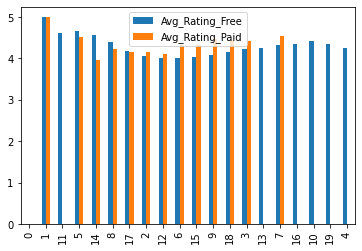

In [55]:
d[['Installs','Avg_Rating_Free','Avg_Rating_Paid']].plot(kind = 'bar')


In [56]:
# DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)
tmp = app_df.groupby(by=['Numeric_Installs','Type'])[['Rating','Reviews']].mean().reset_index().sort_values('Numeric_Installs')
tmp.rename(columns={'Rating':'Average Rating','Reviews': 'Average Number of Reviews'},inplace = True)
tmp.head(10)
free = tmp[tmp['Type']=='Free']
paid = tmp[tmp['Type']=='Paid']
print(free.shape)
print(paid.shape)
free
paid

(20, 4)
(15, 4)


,Numeric_Installs,Type,Average Rating,Average Number of Reviews
1,0,Paid,NaN,0.000000e+00
3,1,Paid,5.000000,3.333333e-01
5,5,Paid,NaN,2.500000e-01
7,10,Paid,4.511111,1.739130e+00
9,50,Paid,3.957143,2.411765e+00
11,100,Paid,4.225373,9.531250e+00
13,500,Paid,4.163889,3.220000e+01
15,1000,Paid,4.142553,1.033716e+02
17,5000,Paid,4.114925,2.881642e+02
19,10000,Paid,4.313178,1.087372e+03


In [57]:
import numpy as np

value = np.random.randint(1, 20, 10)
type = np.random.choice([0, 1, 2], 10)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
seaborn.set() #make the plots look pretty



In [ ]:
app_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Numeric_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000


In [60]:
#VS  In Install column let remove "+"&  "," sign from column so that we can simplify data to analyse in better way 
# Data cleaning of  "Installs" column and making it as Uniform throughout column
app_df['Installs'] = app_df['Installs'].map(lambda x: x.rstrip('+'))
app_df['Installs'] = app_df['Installs'].map(lambda x: ''.join(x.split(',')))
app_df['Installs'] = app_df['Installs'].astype(int)

In [62]:
app_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Numeric_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000


In [64]:
app_df['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10829, dtype: object

In [65]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn

In [ ]:
# Que Finding the corelation between Category & rating & Review & Installs

# Que: Do Apps that have Good Number of Review and Rating are more Populer ( More Installs)?

In [66]:
#VS Lets explore the dataset to find any corelation between Revies, Rating & Installs
# lets apply group by function on Catagory and Reviews, Rating and Installs Columns 
Catagorywise_data=app_df.groupby(['Category'])[['Rating','Reviews','Installs']].mean()
GN1=Catagorywise_data.sort_values('Installs', axis=0, ascending=False)
GN1.rename(columns={'Rating':'Average Rating','Reviews': 'Average No Reviews','Installs': 'Average Installs'},inplace = True)
GN1

,Average Rating,Average No Reviews,Average Installs
Category,,,
COMMUNICATION,4.158537,2.107138e+06,8.435989e+07
SOCIAL,4.255598,2.105903e+06,4.769447e+07
VIDEO_PLAYERS,4.063750,6.307439e+05,3.555430e+07
PRODUCTIVITY,4.211396,2.691438e+05,3.343418e+07
GAME,4.286326,1.385859e+06,3.066960e+07
PHOTOGRAPHY,4.192114,6.373631e+05,3.011417e+07
TRAVEL_AND_LOCAL,4.109292,2.427051e+05,2.662359e+07
NEWS_AND_MAGAZINES,4.132189,1.922292e+05,2.648876e+07
ENTERTAINMENT,4.126174,3.971688e+05,1.925611e+07


In [ ]:
# So now we have got Dataframe for Catgoriwise App Mean rating , Mean Installs and Mean Reviews So Now lets explore is there any trend betwwen them

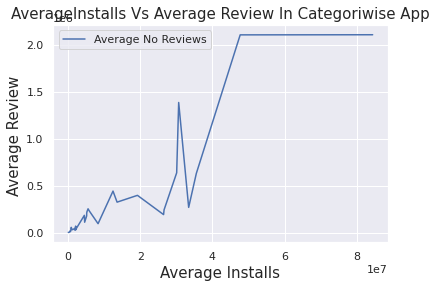

In [69]:
 #VS
 # Create the plot object Install Vs Reviews
ax=GN1.plot.line(x="Average Installs", y= 'Average No Reviews')
# Set the title
ax.set_title("AverageInstalls Vs Average Review In Categoriwise App", fontsize = 15)

# Set x and y-labels
ax.set_xlabel("Average Installs", fontsize = 15)
ax.set_ylabel("Average Review ", fontsize = 15)
seaborn.set() #make the plots look pretty



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Average Rating')

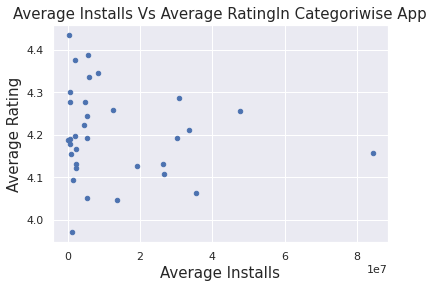

In [70]:
 # Create the plot object Install Vs Rating
# ax = Catagorywise_data.plot.bar(figsize = (10,5),fontsize = 14)
ax=GN1.plot.scatter(x="Average Installs", y= "Average Rating")
# Set the title
ax.set_title("Average Installs Vs Average RatingIn Categoriwise App", fontsize = 15)

# Set x and y-labels
ax.set_xlabel("Average Installs", fontsize = 15)
ax.set_ylabel("Average Rating", fontsize = 15)


SO from above graph we got some idea that for some categories app there is corelation between Review and No of Installs of Apps. **But this is combined  data for Apps so based on this we cant make any prediction need to explore review column** more **because while making prediction of revievs we will get more accurate insights if we consider Categoriwise sentiment of review of apps as well. So now lets explore in that direction**

# So Now in order to get cayegoriwise sentiment of app lets Join The both The dataframe of apps and dataframe for reviews .

In [73]:

# So Now in order to get cayegoriwise sentiment of app lets Join The both The dataframe but before jioning dataframe lets explore datasets of review dataframe

In [132]:
review_df.shape

(64295, 5)

In [133]:
app_df.shape

(10829, 14)

In [ ]:
app_df['App'].nunique()

9648

# Data Cleaning of both Dataframe

So as we saw from above result in app_df dataframe is having some duplicate entries (10829 -9648) lets drop duplicate entries same also check in case Review dataframe and remove inconsistant data if any

In [219]:
#vs#Lets find duplicate entries in App Column and dataframe
# sum(app_df.duplicated(subset='App', keep='first'))
dup= df[app_df.duplicated(keep = 'last')].reset_index()
dup.head()
print("Duplicate Rows :")

Duplicate Rows :


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
#VS# Lets Drop Duplicate entries in App Columnn
app_df2=app_df.drop_duplicates(subset="App")
app_df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Numeric_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000


In [134]:
# So Now this is the new dataframe free from any duplicate entry
app_df2.shape

(9648, 14)

In [135]:
# Now Lets explore review dataframe and check if any in inconsistancy in data and do necessary Data Cleaning 
review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [136]:
#VS # So In this dataset we are having no of reviews for same apps so lets combine data for same app so that\
# we can get appwise values of other parametre from dataframe
temp_review = review_df.groupby(by=['App'])[['Sentiment_Polarity','Sentiment_Subjectivity']].mean().reset_index()
temp_review.rename(columns={'Sentiment_Polarity':'Mean_Sentiment_Polarity','Sentiment_Subjectivity': 'Mean_Sentiment_Subjectivity'},inplace = True)
temp_review.shape

(1074, 3)

In [137]:
temp_review.head(2)

,App,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity
0,10 Best Foods for You,0.470733,0.495455
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516


In [144]:
# Now we know Mean_Sentiment_Subjectivity and 'Mean_Sentiment_Polarity' is most important lets check if any  null values in those columns
sum(temp_review['Mean_Sentiment_Subjectivity'].isnull())

0

In [ ]:
sum(temp_review['Mean_Sentiment_Polarity'].isnull())

In [140]:
#So we are having around 209 row where apps are having null value for Mean_Sentiment_Polarity	Mean_Sentiment_Subjectivity so 
# it will better to drop those rows which are having any 2 value null or missing which are very crucial.
temp_review=temp_review.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [145]:
# so now we dont have any null values in below columns because this are most important parametre from this dataframe.
sum(temp_review['Mean_Sentiment_Subjectivity'].isnull())

0

In [142]:
# Noe lets check summry of review dataframe
temp_review .describe()

,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity
count,865.000000,865.000000
mean,0.200178,0.489814
std,0.163851,0.085871
min,-0.668490,0.000000
25%,0.082766,0.449354
50%,0.197993,0.495240
75%,0.300000,0.537320
max,1.000000,0.916667


In [80]:
review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


Now we have done cleaning both dataset app_df2 and temp_review Dataframe so now lets join both dataframe for geting important data for further analysis

In [148]:
# Lets Join both Dataframe on App columns
new_df=pd.merge(temp_review,app_df2, how='inner', on='App')
new_df.set_index('Category', inplace=True)
new_df.shape

(816, 15)

In [149]:
new_df.describe()

,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Rating,Reviews,Installs,Numeric_Installs
count,816.000000,816.000000,816.000000,8.160000e+02,8.160000e+02,8.160000e+02
mean,0.200473,0.491926,4.282598,7.113919e+05,2.670946e+07,2.670946e+07
std,0.161384,0.085174,0.313643,3.640515e+06,1.099350e+08,1.099350e+08
min,-0.500000,0.000000,2.600000,1.140000e+02,1.000000e+03,1.000000e+03
25%,0.082372,0.452693,4.100000,7.777750e+03,1.000000e+06,1.000000e+06
50%,0.198221,0.497103,4.300000,4.065050e+04,3.000000e+06,3.000000e+06
75%,0.299261,0.537958,4.500000,1.983450e+05,1.000000e+07,1.000000e+07
max,1.000000,0.916667,4.900000,7.815831e+07,1.000000e+09,1.000000e+09


Que: **Is there any corelation between Sentiment_Polarity , Sentiment Subjectivty and popularity of apps?** **bold text**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Installs')

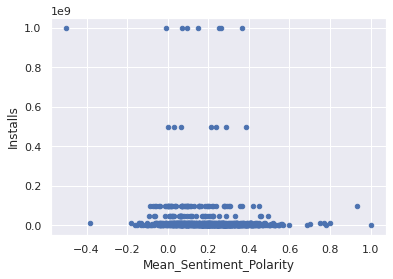

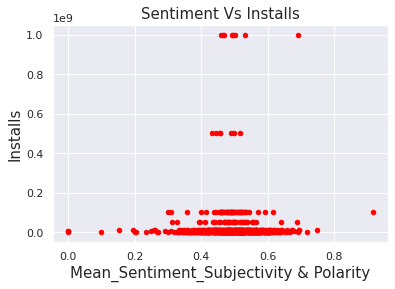

In [83]:
# Lets check any corelation between Sentiment_Polarity , Sentiment Subjectivty and popularity of apps
# Primary checking the trends for Sentiment anlyssis vs Installs
#
ax=new_df.plot.scatter(x="Mean_Sentiment_Polarity", y= "Installs")
ax=new_df.plot.scatter(x="Mean_Sentiment_Subjectivity", y= "Installs", color="red")
# Set the title
ax.set_title("Sentiment Vs Installs" , fontsize = 15)

# Set x and y-labels
ax.set_xlabel("Mean_Sentiment_Subjectivity & Polarity", fontsize = 15)
ax.set_ylabel("Installs", fontsize = 15)


So from above charts it will be little difficult to say that there is any corelation between Sentiment subjectivity , Sentiment Polarity and Installs of App. 
So now lets check if there is any corelation of Category of app and Sentiments of user

In [84]:
#VS Lets combine all the data from both datframe categorywise
# lets apply group by function on Catagory and Reviews Columns 
Catagorywise_data2=new_df.groupby(['Category'])[['Rating','Reviews','Installs','Mean_Sentiment_Polarity','Mean_Sentiment_Subjectivity']].mean()
GN2=Catagorywise_data2.sort_values('Installs', axis=0, ascending=False)
GN2.rename(columns={'Rating':'Average Rating','Reviews': 'Average No Reviews','Installs': 'Average Installs'},inplace = True)
GN2

,Average Rating,Average No Reviews,Average Installs,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity
Category,,,,,
SOCIAL,4.168421,5.148212e+06,1.398737e+08,0.149642,0.479552
COMMUNICATION,4.268293,1.231323e+06,1.048049e+08,0.189158,0.489954
VIDEO_PLAYERS,4.136364,3.389753e+05,9.945455e+07,0.145782,0.478671
PRODUCTIVITY,4.332609,5.718447e+05,8.055652e+07,0.195325,0.480159
NEWS_AND_MAGAZINES,4.219231,1.811262e+05,6.220385e+07,0.156603,0.458257
TOOLS,4.292453,9.750511e+05,6.005283e+07,0.217449,0.466271
BOOKS_AND_REFERENCE,4.334783,2.801697e+05,5.535652e+07,0.263243,0.464572
PHOTOGRAPHY,4.267442,8.398580e+05,4.230465e+07,0.236055,0.492453
ENTERTAINMENT,4.063636,4.649971e+05,3.852879e+07,0.152953,0.486063


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Categoriwise Average Installs')

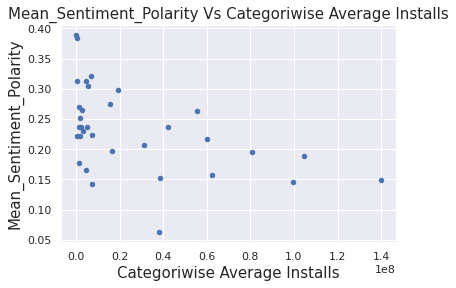

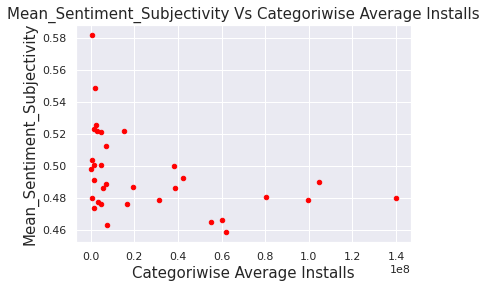

In [152]:
#VS
# Lets check Corelation between the Sentiment polarity , semtiment Subjectivty Install , Catagory Rating
# Let Plot the graph 

ax=GN2.plot.scatter(y="Mean_Sentiment_Polarity", x= "Average Installs")
ax.set_xlabel("Categoriwise Average Installs", fontsize = 15)
ax.set_ylabel("Mean_Sentiment_Polarity", fontsize = 15)
ax.set_title("Mean_Sentiment_Polarity Vs Categoriwise Average Installs" , fontsize = 15)

ax=GN2.plot.scatter(y="Mean_Sentiment_Subjectivity", x= "Average Installs", color="red")
# Set the title
ax.set_title("Mean_Sentiment_Subjectivity Vs Categoriwise Average Installs" , fontsize = 15)

# Set x and y-labels
ax.set_ylabel("Mean_Sentiment_Subjectivity", fontsize = 15)
ax.set_xlabel("Categoriwise Average Installs", fontsize = 15)



**SO from above observation we dont find is there any proper pattern categoriwise avaerage installs and Sentiment polarity , semtiment Subjectivty.**
 
 **So now lets check now for appwise is there in direct corelation between App Installs and Sentiments of USer**

<Figure size 360x360 with 0 Axes>

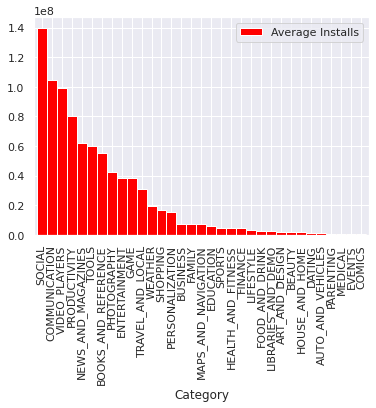

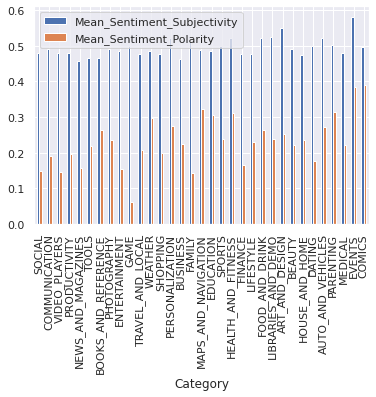

In [264]:
#Lets check corelation between Category and Mean_Sentiment_Subjectivity and Mean_Sentiment_Polarity
plt.figure(figsize=(5,5))
GN2.plot.bar(y='Average Installs', color='red',width=1)
GN2.plot(y=["Mean_Sentiment_Subjectivity", "Mean_Sentiment_Polarity"], kind="bar")
plt.legend()
plt.show()

In [193]:
GN2.corr()

,Average Rating,Average No Reviews,Average Installs,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity
Average Rating,1.000000,-0.063788,-0.191051,0.304524,0.289281
Average No Reviews,-0.063788,1.000000,0.707227,-0.421667,-0.167057
Average Installs,-0.191051,0.707227,1.000000,-0.480458,-0.390677
Mean_Sentiment_Polarity,0.304524,-0.421667,-0.480458,1.000000,0.427827
Mean_Sentiment_Subjectivity,0.289281,-0.167057,-0.390677,0.427827,1.000000


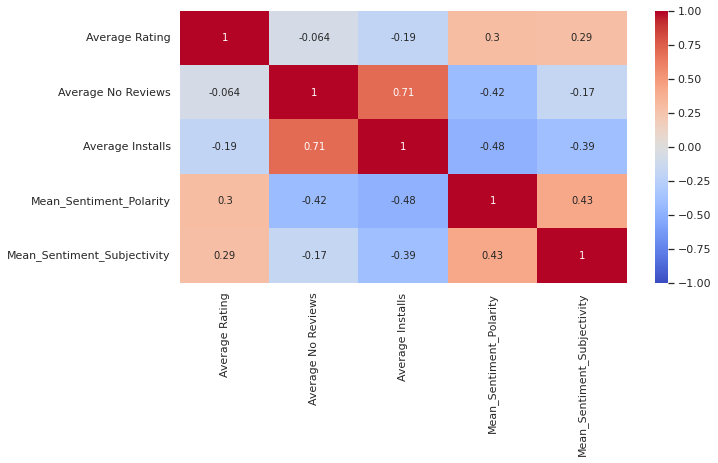

In [194]:
# Drawing Heatmap for apps in COMMUNICATION catagory of  Apps and check corelation between Mean_Sentiment_Polarity	Mean_Sentiment_Subjectivity	Rating	Reviews	Installs
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(GN2.corr(), vmin=-1, cmap='coolwarm', annot=True)


So from above observation **we have found there is coretion between no of reviews and Popularity (No of Installs) of apps** but appart from that
 we dont find there any corelation betweeen  Popular category of App Vs Sentimnet Popularity and Sentiment Subjectivity because **in many case even more populer Categories of apps are having less sentiment polarity as compare to less populer category**. **in case of Sentiment_Subjectivity its almost same for all category** so it will very difficult to conclude based on that is there any direct corelation between them.

Now lets dive little more deeper and check if there is any direct relationship exiest between popularity of individual apps from each category ad lets check for them if any corelation between Reviews, Install and Rating and Sentiment_Polarity and Sentiment_SUbjectivity

In [153]:
#Vs
#So now lets check all apps from SOCIAL category and do our analysis
df3=new_df.loc['SOCIAL', ['App', 'Mean_Sentiment_Polarity', 'Mean_Sentiment_Subjectivity',
       'Rating', 'Reviews', 'Installs']]

In [154]:
df3.sort_values('Installs', axis=0, ascending=True)

,App,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Rating,Reviews,Installs
Category,,,,,,
SOCIAL,Blogaway for Android (Blogger),0.197254,0.359066,3.7,4253,100000
SOCIAL,Bloglovin',0.133953,0.469378,3.9,8936,500000
SOCIAL,All Social Networks,-0.106410,0.513820,4.2,22492,1000000
SOCIAL,Frontback - Social Photos,0.207096,0.461637,3.8,19446,1000000
SOCIAL,Family GPS tracker KidControl + GPS by SMS Loc...,0.211203,0.517123,4.5,57146,1000000
SOCIAL,Banjo,0.230850,0.464122,4.2,58341,1000000
SOCIAL,Facebook Local,0.133642,0.440459,4.2,4751,1000000
SOCIAL,Couple - Relationship App,0.304423,0.581324,4.0,33249,1000000
SOCIAL,"Hide Something - Photo, Video",0.240710,0.512799,4.6,225103,5000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Rating')

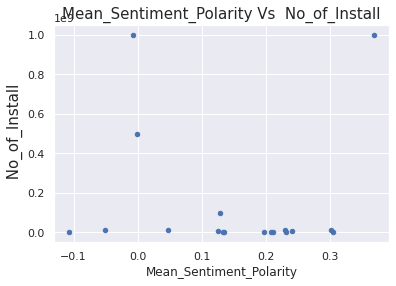

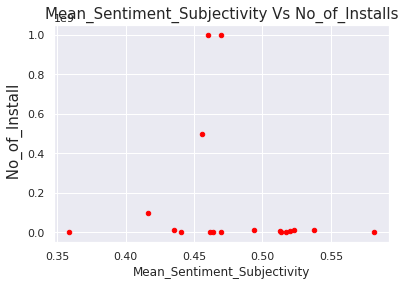

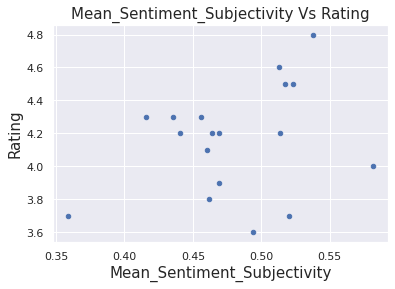

In [157]:
# Now lets check for all apps in Social Catgory 
#Primary checking the trends for Sentiment anlyssis vs Installs for Social Catagory
ax=df3.plot.scatter(x="Mean_Sentiment_Polarity", y= "Installs")
ax.set_ylabel(" No_of_Install", fontsize = 15)
ax.set_title("Mean_Sentiment_Polarity Vs  No_of_Install" , fontsize = 15)
ax=df3.plot.scatter(x="Mean_Sentiment_Subjectivity", y= "Installs", color="red")
ax.set_ylabel(" No_of_Install", fontsize = 15)
ax.set_title("Mean_Sentiment_Subjectivity Vs No_of_Installs" , fontsize = 15)
ax=df3.plot.scatter(x="Mean_Sentiment_Subjectivity", y="Rating")
# Set the title
ax.set_title("Mean_Sentiment_Subjectivity Vs Rating" , fontsize = 15)
# Set x and y-labels
ax.set_xlabel("Mean_Sentiment_Subjectivity", fontsize = 15)
ax.set_ylabel("Rating", fontsize = 15)

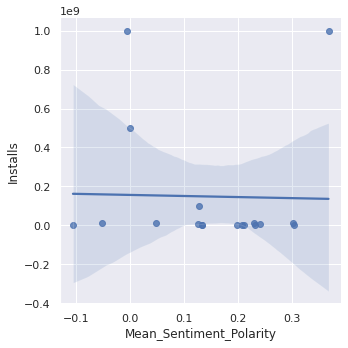

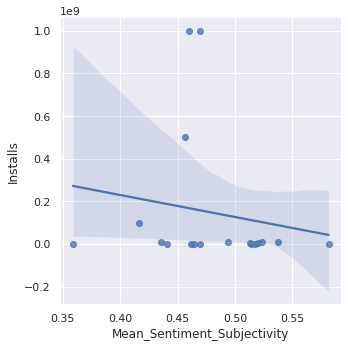

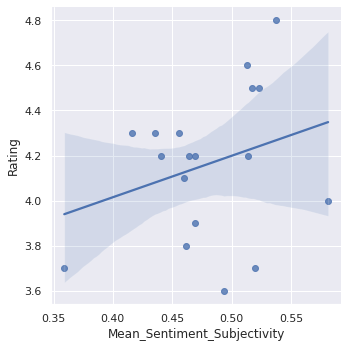

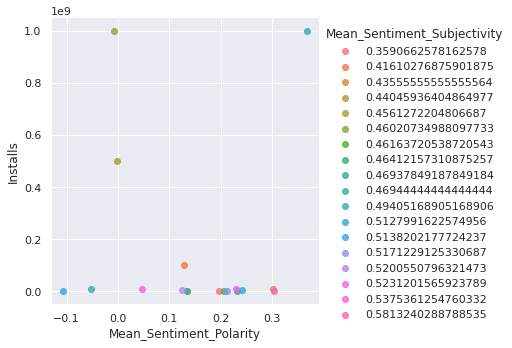

In [201]:
# sns.lmplot(data=df3,x="Mean_Sentiment_Polarity", y= "Installs", col="Mean_Sentiment_Subjectivity", hue="smoker")
import seaborn as sns; sns.set_theme(color_codes=True)
# tips = sns.load_dataset("df3")
g = sns.lmplot(x="Mean_Sentiment_Polarity", y="Installs", data=df3)
g = sns.lmplot(x="Mean_Sentiment_Subjectivity", y="Installs", data=df3)
g = sns.lmplot(x="Mean_Sentiment_Subjectivity", y="Rating", data=df3)
g = sns.lmplot(x="Mean_Sentiment_Polarity", y="Installs", hue="Mean_Sentiment_Subjectivity", data=df3)

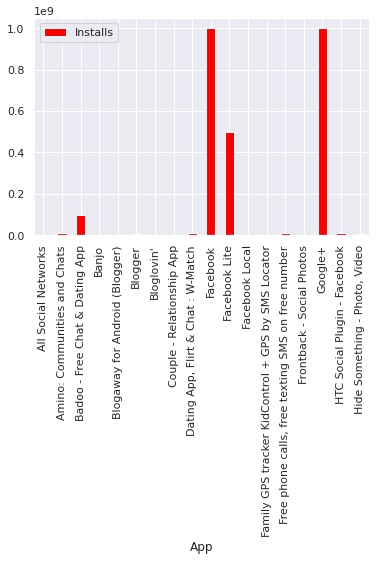

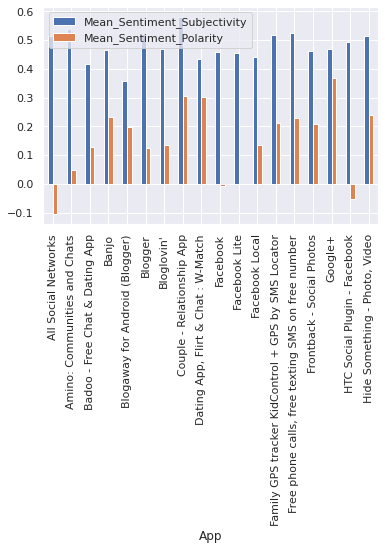

In [252]:
# ax=GN2.plot.bar(x= "Category", y="Mean_Sentiment_Subjectivity", )

df3.plot.bar(y='Installs',color='red')
df3.plot(y=["Mean_Sentiment_Subjectivity", "Mean_Sentiment_Polarity"], kind="bar")
plt.legend()
plt.show()


In [169]:
#VS# SOCIAL Category Apps
#Now lets find corelation Matrix between Mean_Sentiment_Polarity	Mean_Sentiment_Subjectivity	Rating	Reviews	Installs for SOCIAL Category Apps
df3.corr()

,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Rating,Reviews,Installs
Mean_Sentiment_Polarity,1.000000,-0.019762,0.124163,-0.310023,-0.021661
Mean_Sentiment_Subjectivity,-0.019762,1.000000,0.285181,-0.119017,-0.160059
Rating,0.124163,0.285181,1.000000,-0.018118,0.035545
Reviews,-0.310023,-0.119017,-0.018118,1.000000,0.710433
Installs,-0.021661,-0.160059,0.035545,0.710433,1.000000


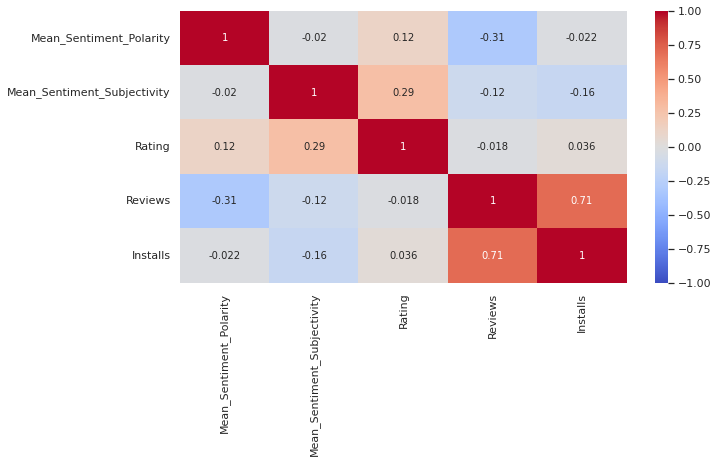

In [168]:
#vs# Now lets draw Heatmap for SOCIAL Cateory Apps and check corelation between Mean_Sentiment_Polarity	Mean_Sentiment_Subjectivity	Rating	Reviews	Installs
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr(), vmin=-1, cmap='coolwarm', annot=True)

So froms above charts we can see that **there is not any direct corelation between Popularity of apps and sentiment Subjectivity because populer app and less populer apps there are having same subjectivty.**

Also **it is true for Sentiment polarity as well** because from graph **even most populer app like facebook which having almost 60% total installs from Social category is having -ve Sentiment polarity and less populer apps are having more sentiment_polarity **except(Google+)** **

Que: Which **category of apps are more populer**? Are there **sure to win Category**? lets Explore *italicized text*

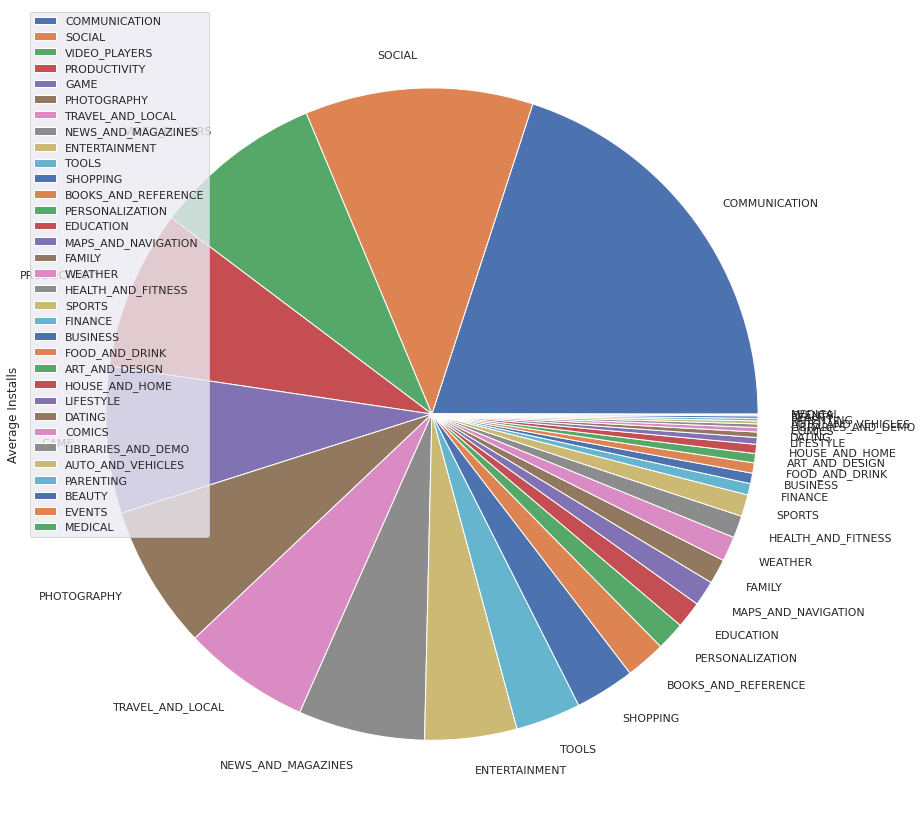

In [96]:
#VS
# lets check the Categariwise market share of apps lets check which catogory of app is more populer in Apps Market
GN1.plot.pie(x='Category', y='Average Installs', figsize=(15, 15))

SO from above Pie chart we cat get some insights that in App Market there are Some categories of Apps which are more populer (More Installs) they are having more number of custmer based for e.g. **COMMUNICATION , SOCIAL,VIDEO PLAYERS, GAME & PRODUCTIVITY this are famous category alomost more that 50% Apps in Market is from this 5 categories only out of 32 Category, in that also almost 20% of Total Installs is of Communication categories only,** So surely there are certaing categories of apps are more populer **but it may not be true for all apps in that populer category.**
**So Now I thnk need to explore that is there in populer categories does all apps in that category are performing well or does in that segment also market is capture by some populer Apps??**

In [103]:
df3.set_index('App', inplace=True)

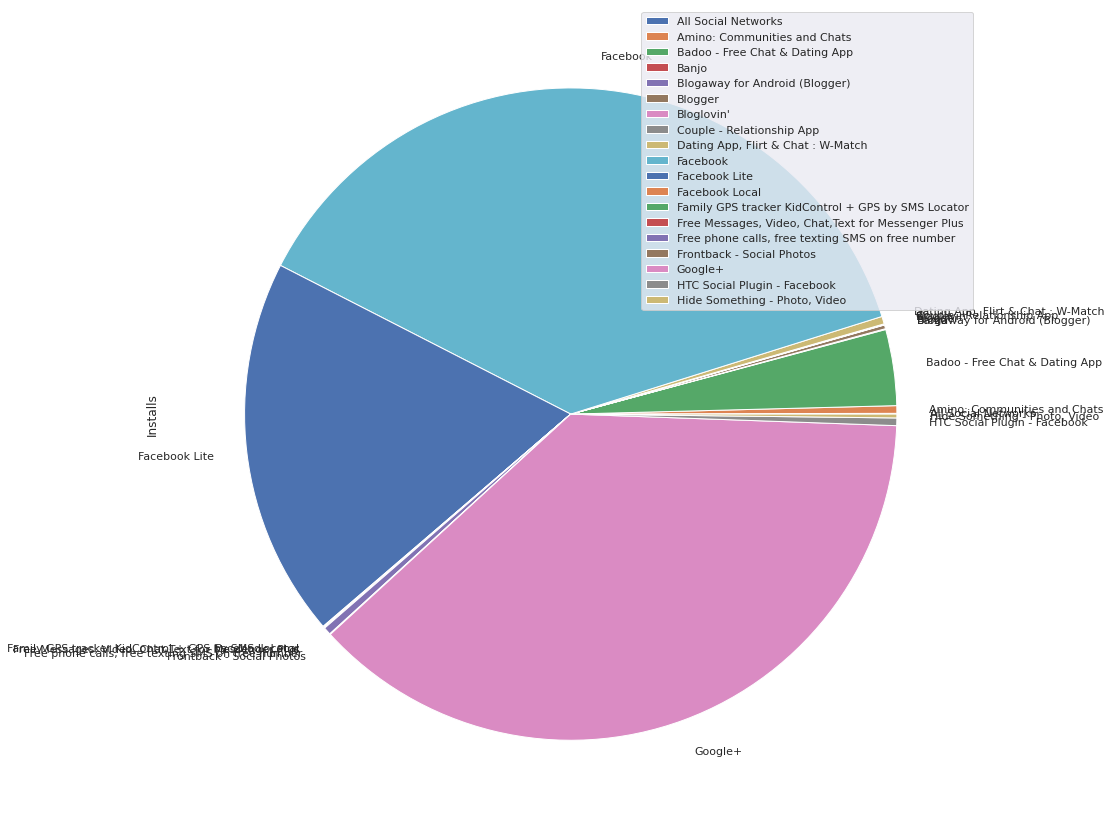

In [104]:
#VS Ok So Now lets check the Market Share of All apps in SOCIAL Category and see in that segment also is market capture by/
# some populer Apps or All apps in this category are populer?
# lets check the market share of apps in SOCIAL Category with help of pie chart
df3.plot.pie(x='App', y='Installs', figsize=(15, 15))

SO as we see in from above Chart In Social Caegory App more than 90 % of total app market is capture by the Only 2 Apps facebook and Google+ only. And in that also more than 60% of users who are using Social apps are using Facebook as compare to other social apps. S**o although social app is 2nd most populer category in terms of installs but from above chart we can understood that almost 90 % of Installs in social category from only two apps Facebook and Google.**


 **So now lets check is it is true for every category  that few apps from that category are having lions share in No of Installs of that category??**

In [105]:
# Lets Check  now for COMMUNICATION Category Lets First get dataframe of apps of this category by applying group by function
df4=new_df.loc['COMMUNICATION', ['App', 'Mean_Sentiment_Polarity', 'Mean_Sentiment_Subjectivity',
       'Rating', 'Reviews', 'Installs']]
df4.sort_values('Installs', axis=0, ascending=True)

,App,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Rating,Reviews,Installs
Category,,,,,,
COMMUNICATION,2ndLine - Second Phone Number,0.168968,0.377023,4.2,15880,1000000
COMMUNICATION,Firefox Focus: The privacy browser,0.209249,0.553828,4.4,36880,1000000
COMMUNICATION,Caller ID +,0.350000,0.600000,4.0,9498,1000000
COMMUNICATION,Burner - Free Phone Number,0.065301,0.636111,4.3,14873,1000000
COMMUNICATION,Ghostery Privacy Browser,NaN,NaN,4.1,13100,1000000
COMMUNICATION,Email TypeApp - Mail App,NaN,NaN,4.6,183374,1000000
COMMUNICATION,All Email Providers,0.215000,0.606667,4.1,20901,1000000
COMMUNICATION,CIA - Caller ID & Call Blocker,0.217815,0.429830,4.0,60308,5000000
COMMUNICATION,Call Control - Call Blocker,-0.041667,0.291667,4.4,93825,5000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Rating')

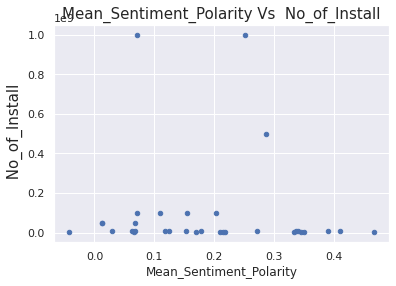

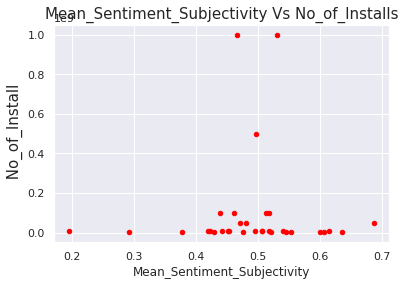

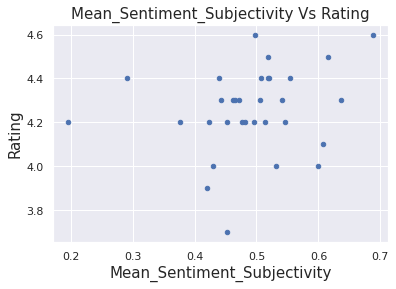

In [158]:
#  Primary checking the trends for Sentiment anlyssis vs Installs for Social Catagory
ax=df4.plot.scatter(x="Mean_Sentiment_Polarity", y= "Installs")
ax.set_ylabel(" No_of_Install", fontsize = 15)
ax.set_title("Mean_Sentiment_Polarity Vs  No_of_Install" , fontsize = 15)
ax=df4.plot.scatter(x="Mean_Sentiment_Subjectivity", y= "Installs", color="red")
ax.set_ylabel(" No_of_Install", fontsize = 15)
ax.set_title("Mean_Sentiment_Subjectivity Vs No_of_Installs" , fontsize = 15)
ax=df4.plot.scatter(x="Mean_Sentiment_Subjectivity", y="Rating")
# Set the title
ax.set_title("Mean_Sentiment_Subjectivity Vs Rating" , fontsize = 15)
# Set x and y-labels
ax.set_xlabel("Mean_Sentiment_Subjectivity", fontsize = 15)
ax.set_ylabel("Rating", fontsize = 15)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128044 missing from current font.
  font.set_text(s, 0, flags=flags)


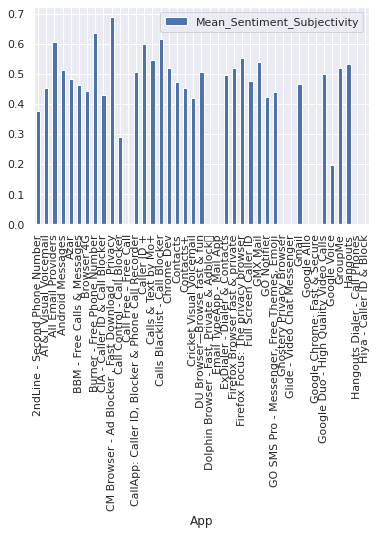

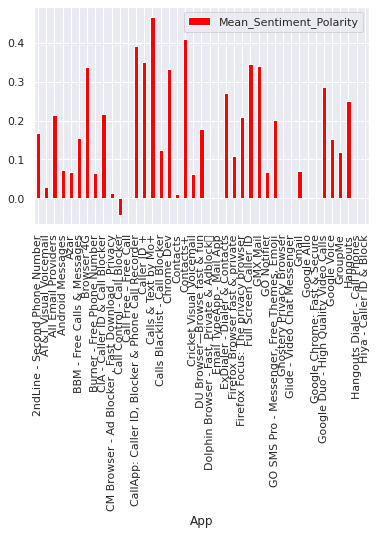

In [130]:
# ax=GN2.plot.bar(x= "Apps", y="Mean_Sentiment_Subjectivity", )

%matplotlib inline
import matplotlib.pyplot as plt
df4.plot.bar(y='Mean_Sentiment_Subjectivity')
df4.plot.bar(y='Mean_Sentiment_Polarity',color='red')

In [170]:
#Now lets find corelation Matrix between Mean_Sentiment_Polarity	Mean_Sentiment_Subjectivity	Rating	Reviews	Installs for Communication Category Apps
df4.corr()

,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Rating,Reviews,Installs
Mean_Sentiment_Polarity,1.000000,0.149637,-0.013197,-0.124207,-0.046464
Mean_Sentiment_Subjectivity,0.149637,1.000000,0.220353,0.014852,0.031758
Rating,-0.013197,0.220353,1.000000,0.148019,0.001635
Reviews,-0.124207,0.014852,0.148019,1.000000,0.570364
Installs,-0.046464,0.031758,0.001635,0.570364,1.000000


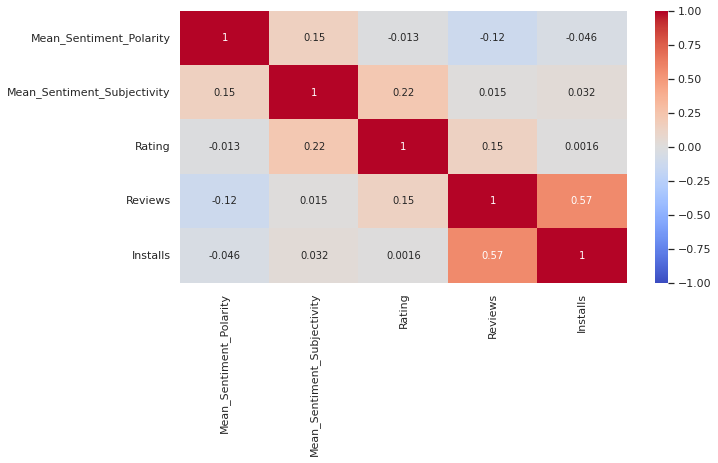

In [173]:
# Drawing Heatmap for apps in COMMUNICATION catagory of  Apps and check corelation between Mean_Sentiment_Polarity	Mean_Sentiment_Subjectivity	Rating	Reviews	Installs
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df4.corr(), vmin=-1, cmap='coolwarm', annot=True)


So froms above charts we can see that **there is not any direct corelation between Popularity of apps and sentiment Subjectivity because populer app and less populer apps there are having same subjectivty.**
Also **it is true for Sentiment polarity as well** because from graph **even most populer app like Gmails, Hangout, Google duo which having almost 80% total installs from COMMUNICATION category is having less Sentiment polarity as compare to less populer apps**

In [179]:
df4.set_index('App', inplace=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128044 missing from current font.
  font.set_text(s, 0, flags=flags)


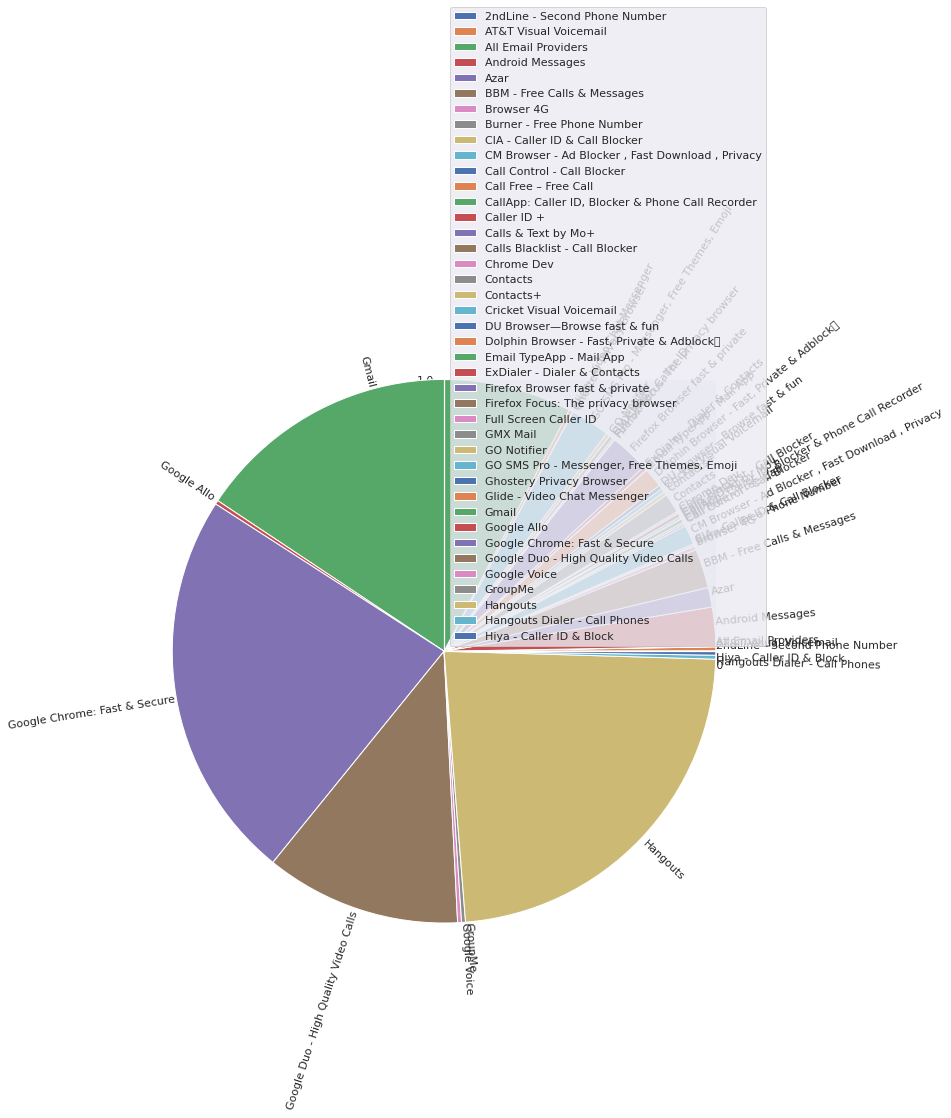

In [192]:
# lets check the market share of apps with help of pie chart
%matplotlib inline
import matplotlib.pyplot as plt
df4.plot.pie(x="App", y='Installs', figsize=(5,5),frame=True,labeldistance=1,rotatelabels = True)

So Even for Communication category also is domminated by 4 Apps of same company,  **In Communocation category almost 80% of total no of Installs in this category is from 4 apps Gmail, Google Chrome, Google duo and Hangouts all from Google.** So Npw lets check is it true for less populer categories as well.

In [237]:
# Lets Check  now for COMMUNICATION Category Lets First get dataframe of apps of this category by applying group by function
df4=new_df.loc['COMICS', ['App', 'Mean_Sentiment_Polarity', 'Mean_Sentiment_Subjectivity',
       'Rating', 'Reviews', 'Installs']]
df4.sort_values('Installs', axis=0, ascending=True)

,App,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Rating,Reviews,Installs
Category,,,,,,
COMICS,"Best Wallpapers Backgrounds(100,000+ 4K HD)",0.300429,0.389949,4.7,3596,10000
COMICS,DC Comics,0.478809,0.605347,4.2,25671,1000000


In [239]:
# Lets Check  now for 'EVENTS' Category Lets First get dataframe of apps of this category by applying group by function
Events=new_df.loc['EVENTS', ['App', 'Mean_Sentiment_Polarity', 'Mean_Sentiment_Subjectivity',
       'Rating', 'Reviews', 'Installs']]
Events.sort_values('Installs', axis=0, ascending=True)

,App,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Rating,Reviews,Installs
Category,,,,,,
EVENTS,DroidAdmin for Android - Advice,0.126175,0.507450,4.2,811,10000
EVENTS,All Events in City,0.502860,0.561821,4.0,3782,100000
EVENTS,Goldstar: Live Event Tickets,0.549266,0.635455,4.5,1953,100000
EVENTS,Happy Birthday Songs Offline,0.364706,0.634314,4.4,464,100000
EVENTS,"Gametime - Tickets to Sports, Concerts, Theater",0.379740,0.570218,4.5,8800,1000000


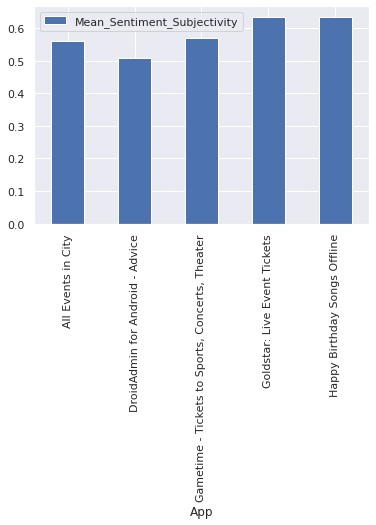

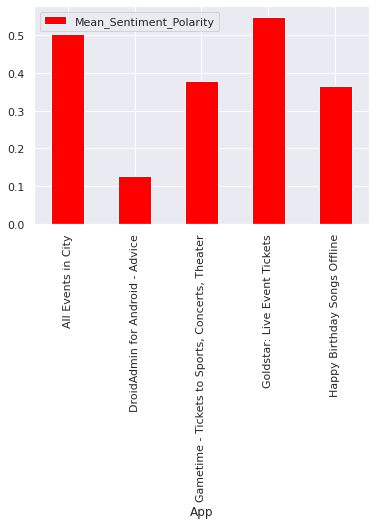

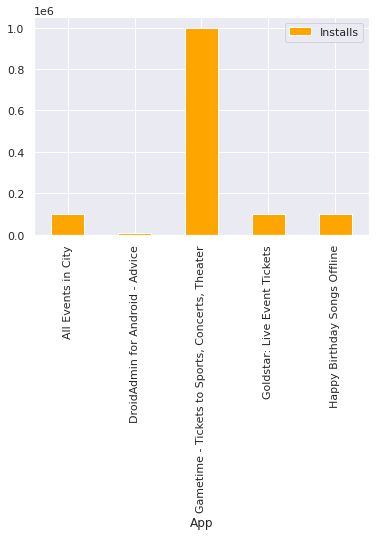

In [245]:
%matplotlib inline
import matplotlib.pyplot as plt
Events.plot.bar(y='Mean_Sentiment_Subjectivity')
Events.plot.bar(y='Mean_Sentiment_Polarity',color='red')
Events.plot.bar(y='Installs',color='orange')

In [ ]:
Events.set_index('App', inplace=True)

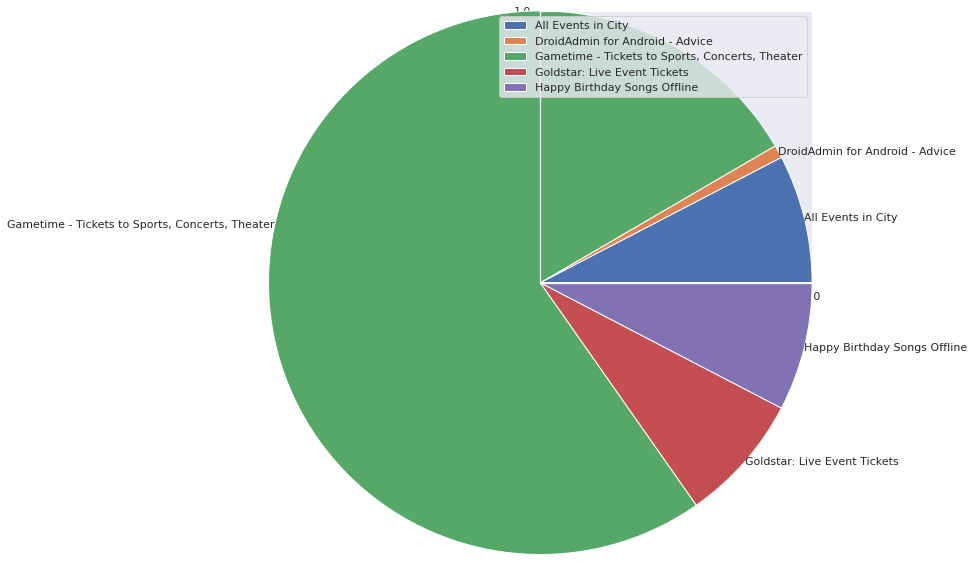

In [243]:
# lets check the market share of apps with help of pie chart
%matplotlib inline
import matplotlib.pyplot as plt
Events.plot.pie(x="App", y='Installs', figsize=(5,5),frame=True,labeldistance=1,rotatelabels = False)

In [234]:
GN2

,Average Rating,Average No Reviews,Average Installs,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity
Category,,,,,
SOCIAL,4.168421,5.148212e+06,1.398737e+08,0.149642,0.479552
COMMUNICATION,4.268293,1.231323e+06,1.048049e+08,0.189158,0.489954
VIDEO_PLAYERS,4.136364,3.389753e+05,9.945455e+07,0.145782,0.478671
PRODUCTIVITY,4.332609,5.718447e+05,8.055652e+07,0.195325,0.480159
NEWS_AND_MAGAZINES,4.219231,1.811262e+05,6.220385e+07,0.156603,0.458257
TOOLS,4.292453,9.750511e+05,6.005283e+07,0.217449,0.466271
BOOKS_AND_REFERENCE,4.334783,2.801697e+05,5.535652e+07,0.263243,0.464572
PHOTOGRAPHY,4.267442,8.398580e+05,4.230465e+07,0.236055,0.492453
ENTERTAINMENT,4.063636,4.649971e+05,3.852879e+07,0.152953,0.486063
